<a href="https://colab.research.google.com/github/faranak5171/Data-Manipulation/blob/main/Cifar10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torchvision import datasets, transforms, utils
from torch.utils.data import DataLoader, SubsetRandomSampler

import warnings
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

trainset = datasets.CIFAR10('data', download=True, train=True, transform=transform)
testset = datasets.CIFAR10('data', download=True, train=False, transform=transform)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [4]:
val_size = 0.2
num_indices = len(trainset)
indices = list(range(num_indices))
np.random.shuffle(indices)
val_index = int(val_size*num_indices)
train_idx, val_idx = indices[val_index:], indices[:val_index]

train_sampler = SubsetRandomSampler(train_idx)
val_sampler = SubsetRandomSampler(val_idx)

trainloader = DataLoader(trainset, batch_size=64, sampler=train_sampler)
valloader = DataLoader(trainset, batch_size=64, sampler=val_sampler)
testloader = DataLoader(testset, batch_size=64)

In [5]:
# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck']

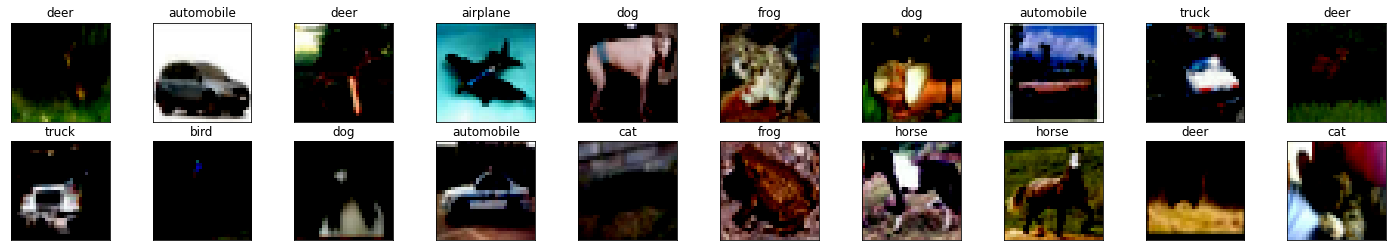

In [6]:
images, labels = next(iter(trainloader))
fig = plt.figure(figsize=(25,4))
for idx in range(20):
  ax = fig.add_subplot(2,10,idx+1, xticks=[], yticks=[])
  plt.imshow(utils.make_grid(images[idx]).permute(1,2,0))
  ax.set_title(classes[labels[idx]])
warnings.filterwarnings("ignore", category=FutureWarning)

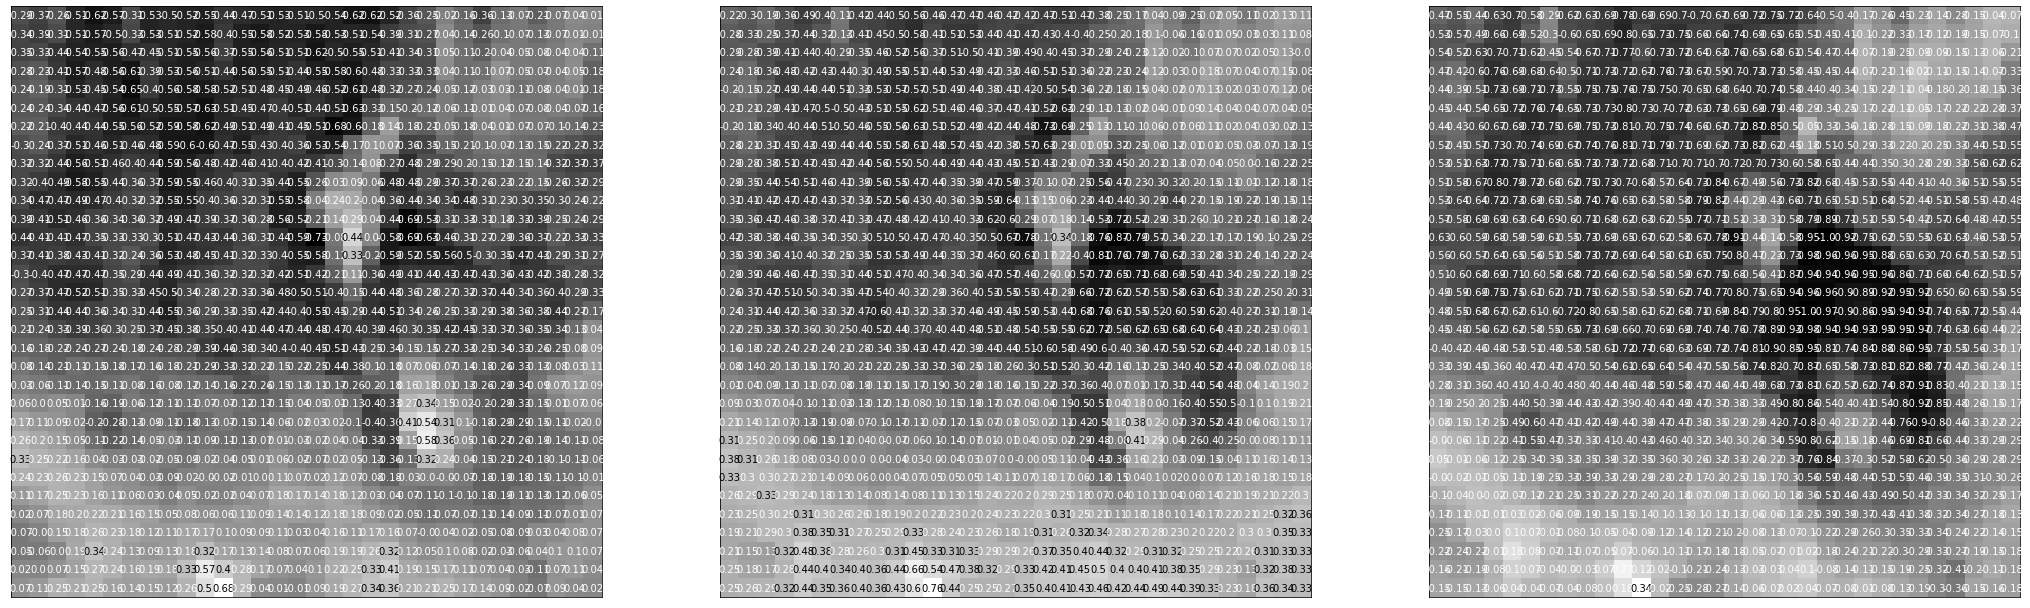

In [40]:
# View image in more details
width = images[0].shape[1]
height = images[0].shape[2]
max_num = torch.max(images[0])
thresh = max_num / 2.5

fig = plt.figure(figsize=(36,36))
channels=['red', 'green','blue']
for ch in range(len(channels)):
  img = images[0].numpy().squeeze()[ch]
  ax = fig.add_subplot(1,3,ch+1, xticks=[], yticks=[])
  ax.imshow(img, cmap='gray')
  for x in range(width):
    for y in range(width):
      value = round(img[x][y],2)
      ax.annotate(str(value) , xy=(y,x),
                horizontalalignment = 'center',
                verticalalignment='center',
                color='white' if img[x][y]<thresh else 'black')

In [3]:
device = "CUDA" if torch.cuda.is_available() else "CPU"

'CUDA'